In [127]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras import models, layers, regularizers, utils
from tensorflow import stack

In [41]:
image_path = './gtsrb/0/00000_00000.ppm'

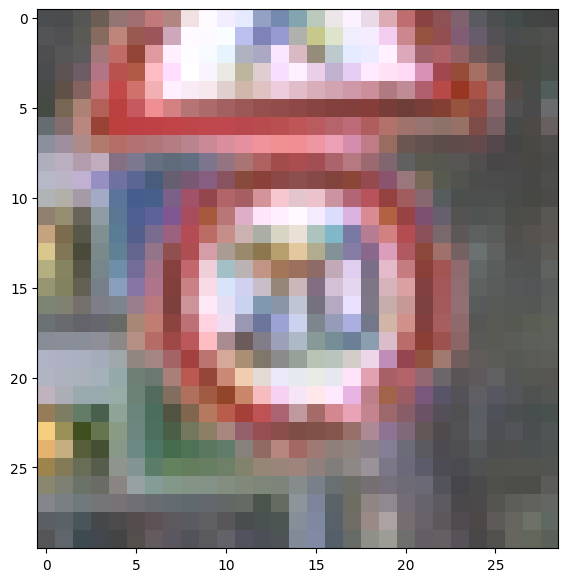

In [3]:
img = Image.open(image_path)
plt.figure(figsize=(7, 7))
plt.imshow(img)

In [76]:
# Image embedding thành vector (2048, )
def encode(image, IMG_WIDTH=30, IMG_HEIGHT=30):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    return img

In [69]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """

    images = []
    labels = []
    # Path to data folder
    data_path = os.path.join(data_dir)

    # Number of subdirectories/labels
    number_of_labels = 0

    for i in os.listdir(data_path):
        number_of_labels += 1

    # Loop through the subdirectories
    for sub in range(number_of_labels):
        sub_folder = os.path.join(data_path, str(sub))
        print(sub_folder)
        
        images_in_subfolder = []

        for image in os.listdir(sub_folder):
            images_in_subfolder.append(image)

        images_in_subfolder_path = os.path.join(data_path, str(sub))
        
        for image in tqdm(os.listdir(images_in_subfolder_path)):
            img_arr = cv2.imread(f'{sub_folder}\\{image}')   
            img = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            img = encode(img)
            images.append(img)
            labels.append(sub)
            
    return images, labels

In [106]:
IMG_WIDTH=30
IMG_HEIGHT=30
CLASS_NUM = 43

def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """

    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        # layers.ZeroPadding2D(padding=(2,2)),
        
        layers.Conv2D(16, (7,7), strides=(2, 2), padding='same'),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        # layers.ZeroPadding2D(padding=(2,2)),
        layers.Conv2D(42, (5, 5), strides=(1, 1), padding='same'),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same'),
        layers.Activation('relu'),
        # layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        layers.Conv2D(42, (3, 3), strides=(1, 1), padding='same'),
        layers.Activation('relu'),
        # layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        layers.Conv2D(42, (3, 3), strides=(1, 1), padding='same'),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        # layers.Conv2D(36, (3, 3), strides=(2, 2), padding='same'),
        # layers.BatchNormalization(),
        # layers.Activation('relu'),

        # # layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
        # # layers.BatchNormalization(),
        # # layers.Activation('relu'),
        # layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(120, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),

        # layers.Dense(128, activation='relu'),
        # layers.Dropout(0.25),
        
        # layers.Dense(128, activation='relu'),
        # layers.Dropout(0.25),
        
        layers.Dense(CLASS_NUM, activation='softmax', kernel_regularizer=regularizers.l2(l2=0.001))
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [77]:
images, labels = load_data('gtsrb')

gtsrb\0


100%|██████████| 150/150 [00:00<00:00, 3953.56it/s]


gtsrb\1


100%|██████████| 1500/1500 [00:00<00:00, 6880.81it/s]


gtsrb\2


100%|██████████| 1500/1500 [00:00<00:00, 4807.69it/s]


gtsrb\3


100%|██████████| 960/960 [00:00<00:00, 5748.53it/s]


gtsrb\4


100%|██████████| 1320/1320 [00:00<00:00, 6502.62it/s]


gtsrb\5


100%|██████████| 1260/1260 [00:00<00:00, 4228.23it/s]


gtsrb\6


100%|██████████| 300/300 [00:00<00:00, 4285.21it/s]


gtsrb\7


100%|██████████| 960/960 [00:00<00:00, 5303.87it/s]


gtsrb\8


100%|██████████| 960/960 [00:00<00:00, 5549.20it/s]


gtsrb\9


100%|██████████| 990/990 [00:00<00:00, 6688.92it/s]


gtsrb\10


100%|██████████| 1350/1350 [00:00<00:00, 7258.01it/s]


gtsrb\11


100%|██████████| 900/900 [00:00<00:00, 5588.91it/s]


gtsrb\12


100%|██████████| 1410/1410 [00:00<00:00, 7121.29it/s]


gtsrb\13


100%|██████████| 1440/1440 [00:00<00:00, 7092.39it/s]


gtsrb\14


100%|██████████| 540/540 [00:00<00:00, 2534.84it/s]


gtsrb\15


100%|██████████| 420/420 [00:00<00:00, 5250.26it/s]


gtsrb\16


100%|██████████| 300/300 [00:00<00:00, 2856.78it/s]


gtsrb\17


100%|██████████| 750/750 [00:00<00:00, 5395.80it/s]


gtsrb\18


100%|██████████| 810/810 [00:00<00:00, 5785.80it/s]


gtsrb\19


100%|██████████| 150/150 [00:00<00:00, 3409.06it/s]


gtsrb\20


100%|██████████| 240/240 [00:00<00:00, 1919.95it/s]


gtsrb\21


100%|██████████| 240/240 [00:00<00:00, 5581.49it/s]


gtsrb\22


100%|██████████| 270/270 [00:00<00:00, 5399.85it/s]


gtsrb\23


100%|██████████| 360/360 [00:00<00:00, 3913.09it/s]


gtsrb\24


100%|██████████| 180/180 [00:00<00:00, 4186.05it/s]


gtsrb\25


100%|██████████| 1020/1020 [00:00<00:00, 4377.77it/s]


gtsrb\26


100%|██████████| 420/420 [00:00<00:00, 5000.09it/s]


gtsrb\27


100%|██████████| 180/180 [00:00<00:00, 4736.26it/s]


gtsrb\28


100%|██████████| 360/360 [00:00<00:00, 3302.87it/s]


gtsrb\29


100%|██████████| 180/180 [00:00<00:00, 2571.36it/s]


gtsrb\30


100%|██████████| 300/300 [00:00<00:00, 1554.42it/s]


gtsrb\31


100%|██████████| 540/540 [00:00<00:00, 4537.91it/s]


gtsrb\32


100%|██████████| 180/180 [00:00<00:00, 5625.37it/s]


gtsrb\33


100%|██████████| 480/480 [00:00<00:00, 3221.48it/s]


gtsrb\34


100%|██████████| 300/300 [00:00<00:00, 3750.07it/s]


gtsrb\35


100%|██████████| 810/810 [00:00<00:00, 5126.62it/s]


gtsrb\36


100%|██████████| 270/270 [00:00<00:00, 4355.15it/s]


gtsrb\37


100%|██████████| 150/150 [00:00<00:00, 3060.95it/s]


gtsrb\38


100%|██████████| 1380/1380 [00:00<00:00, 4758.63it/s]


gtsrb\39


100%|██████████| 210/210 [00:00<00:00, 2877.00it/s]


gtsrb\40


100%|██████████| 240/240 [00:00<00:00, 3117.01it/s]


gtsrb\41


100%|██████████| 180/180 [00:00<00:00, 2686.48it/s]


gtsrb\42


100%|██████████| 180/180 [00:00<00:00, 3103.61it/s]


(30, 30, 3)
một hình ví dụ:  0


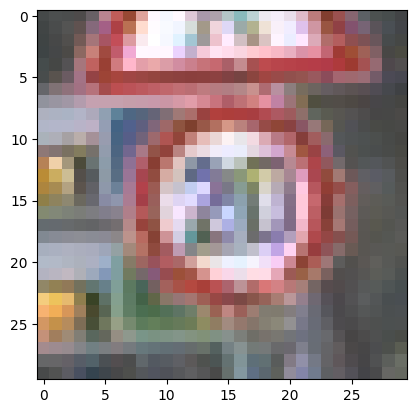

In [82]:
index = 1
print(images[index].shape)
print("một hình ví dụ: ", labels[index])
img = Image.fromarray(images[index], 'RGB')
plt.imshow(img)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3, random_state=123)

y_train = utils.to_categorical(labels, num_classes=CLASS_NUM)

In [136]:
print("Hình dạng của tập images", X_train.shape)
print(X_train[0])

Hình dạng của tập images (18648, 30, 30, 3)
[[[163 172 152]
  [ 92 104  86]
  [ 73  86  74]
  ...
  [ 90  93  81]
  [ 90  83  74]
  [ 86  67  62]]

 [[186 191 167]
  [100 111  81]
  [ 71  86  73]
  ...
  [ 88  99  83]
  [ 74  82  65]
  [ 69  65  59]]

 [[139 148 120]
  [ 97 110  82]
  [ 69  84  71]
  ...
  [ 62  76  59]
  [ 48  62  39]
  [ 52  57  48]]

 ...

 [[ 66  67  70]
  [ 65  64  68]
  [ 73  70  76]
  ...
  [203 175 218]
  [139 130 152]
  [133 146 166]]

 [[ 68  67  72]
  [ 65  62  74]
  [ 73  71  79]
  ...
  [251 211 242]
  [206 182 197]
  [154 153 167]]

 [[ 66  67  77]
  [ 62  62  83]
  [ 72  72  83]
  ...
  [255 249 254]
  [224 210 208]
  [164 156 160]]]


In [113]:
print("Hình dạng của tập label", y_train.shape)
print(y_train[0:3])

Hình dạng của tập label (18648, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [114]:
lenet_model = get_model()

d:\Programming\Trafficsign\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
lenet_model.fit(X_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8609 - loss: 0.4441
Epoch 2/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8805 - loss: 0.4023
Epoch 3/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9020 - loss: 0.3335
Epoch 4/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9112 - loss: 0.3062
Epoch 5/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9126 - loss: 0.3100
Epoch 6/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9321 - loss: 0.2373
Epoch 7/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9350 - loss: 0.2301
Epoch 8/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9452 - loss: 0.2052
Epoch 9/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9448 - loss: 0.2171
Epoch 10/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9537 - loss: 0.1763
Epoch 11/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9525 - loss: 0.1831
Epoch 12/15
292/292 ━━━━━━━━━━━━━━━━━━━━ 

In [117]:
lenet_model.save('./model/traffic_95_acc.h5')

In [131]:
y_pred = lenet_model.predict(X_test)
predictions = [np.argmax(pred) for pred in y_pred]

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [137]:
print("MSE: ", mean_squared_error(y_test, predictions))
print("Confusion matrix: ", confusion_matrix(y_test, predictions))

MSE:  3.2254754754754753
Confusion matrix:  [[ 34   0   0 ...   0   0   0]
 [  2 445  19 ...   0   0   0]
 [  0   6 407 ...   0   0   0]
 ...
 [  0   1   0 ...  71   0   0]
 [  0   0   0 ...   0  59   0]
 [  0   0   0 ...   0   0  46]]


In [138]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       0.97      0.93      0.95       476
           2       0.92      0.96      0.94       422
           3       0.92      0.90      0.91       286
           4       0.99      0.94      0.96       379
           5       0.91      0.87      0.89       423
           6       0.98      0.99      0.98        88
           7       0.83      0.97      0.89       268
           8       0.92      0.91      0.92       282
           9       0.98      0.99      0.99       287
          10       0.98      0.99      0.98       420
          11       0.98      0.98      0.98       263
          12       1.00      1.00      1.00       424
          13       0.99      0.99      0.99       411
          14       0.99      0.99      0.99       166
          15       1.00      0.97      0.98       121
          16       0.98      1.00      0.99        99
          17       0.99    